In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [16]:

data = pd.read_csv('crop_production.csv')
data = pd.pivot_table(data,index=['State_Name', 'District_Name', 'Season', 'Crop'], columns='Crop_Year', values=['Area', 'Production']).swaplevel(0, 1, axis=1).sort_index(axis=1)

rows,cols = data.shape
data.head()


Crop_Year                                                                 1997  \
                                                                          Area   
State_Name                  District_Name Season      Crop                       
Andaman and Nicobar Islands NICOBARS      Autumn      Rice                 NaN   
                                                      Sugarcane            NaN   
                                          Kharif      Arecanut             NaN   
                                                      Other Kharif pulses  NaN   
                                                      Rice                 NaN   

Crop_Year                                                                             \
                                                                          Production   
State_Name                  District_Name Season      Crop                             
Andaman and Nicobar Islands NICOBARS      Autumn      Rice                       NaN   
                                                      Sugarcane                  NaN   
                                          Kharif      Arecanut                   NaN   
                                                      Other Kharif pulses        NaN   
                                                      Rice                       NaN   

Crop_Year                                                                 1998  \
                                                                          Area   
State_Name                  District_Name Season      Crop                       
Andaman and Nicobar Islands NICOBARS      Autumn      Rice                 NaN   
                                                      Sugarcane            NaN   
                                          Kharif      Arecanut             NaN   
                                                      Other Kharif pulses  NaN   
                                                      Rice                 NaN   

Crop_Year                                                                             \
                                                                          Production   
State_Name                  District_Name Season      Crop                             
Andaman and Nicobar Islands NICOBARS      Autumn      Rice                       NaN   
                                                      Sugarcane                  NaN   
                                          Kharif      Arecanut                   NaN   
                                                      Other Kharif pulses        NaN   
                                                      Rice                       NaN   

Crop_Year                                                                 1999  \
                                                                          Area   
State_Name                  District_Name Season      Crop                       
Andaman and Nicobar Islands NICOBARS      Autumn      Rice                 NaN   
                                                      Sugarcane            NaN   
                                          Kharif      Arecanut             NaN   
                                                      Other Kharif pulses  NaN   
                                                      Rice                 NaN   

Crop_Year                                                                             \
                                                                          Production   
State_Name                  District_Name Season      Crop                             
Andaman and Nicobar Islands NICOBARS      Autumn      Rice                       NaN   
                                                      Sugarcane                  NaN   
                                          Kharif      Arecanut                   NaN   
                                                      Other Kharif pulses        NaN   
   

In [17]:
# 1
df1 = data[0:rows//2]
print(df1.head())
df2 = data[rows//2:rows]
print(df2.head())

Crop_Year                                                                 1997  \
                                                                          Area   
State_Name                  District_Name Season      Crop                       
Andaman and Nicobar Islands NICOBARS      Autumn      Rice                 NaN   
                                                      Sugarcane            NaN   
                                          Kharif      Arecanut             NaN   
                                                      Other Kharif pulses  NaN   
                                                      Rice                 NaN   

Crop_Year                                                                             \
                                                                          Production   
State_Name                  District_Name Season      Crop                             
Andaman and Nicobar Islands NICOBARS      Autumn      Rice                     

In [18]:
# 2
print("count of NaN values in Df1 :")
print(df1.isnull().sum())
print(df2.isnull().sum())

count of NaN values in Df1 :
Crop_Year            
1997       Area          12544
           Production    12544
1998       Area          10999
           Production    11168
1999       Area          10301
           Production    10334
2000       Area           9422
           Production     9475
2001       Area           9243
           Production     9277
2002       Area           7685
           Production     7721
2003       Area           7456
           Production     7492
2004       Area           9150
           Production     9328
2005       Area           8781
           Production     8961
2006       Area           8819
           Production     9098
2007       Area           8535
           Production     8731
2008       Area           8705
           Production     8907
2009       Area           9166
           Production     9401
2010       Area           8428
           Production     8670
2011       Area           8439
           Production     8687
2012       Area    

In [19]:
# 3
print(df1.fillna(method='ffill').tail(5))

Crop_Year                                                 1997             \
                                                          Area Production   
State_Name  District_Name Season      Crop                                  
Maharashtra LATUR         Kharif      Sunflower        20700.0     5500.0   
                                      Total foodgrain   3796.0     2214.0   
                                      Urad             74300.0    15300.0   
                                      other oilseeds   74300.0    15300.0   
                          Rabi        Gram             74300.0    15300.0   

Crop_Year                                                 1998             \
                                                          Area Production   
State_Name  District_Name Season      Crop                                  
Maharashtra LATUR         Kharif      Sunflower        25600.0    11500.0   
                                      Total foodgrain  25600.0    11500.0  

In [9]:
# 4
print(df2.fillna(method='bfill').tail(5))

Crop_Year                                           1997                 1998  \
                                                    Area Production      Area   
State_Name  District_Name Season      Crop                                      
West Bengal PURULIA       Whole Year  Tobacco      216.0       93.0     240.0   
                                      Turmeric     216.0       93.0     240.0   
                          Winter      Potato    315095.0   595830.0  227172.0   
                                      Rice      315095.0   595830.0  227172.0   
                                      Sesamum        NaN        NaN       NaN   

Crop_Year                                                      1999  \
                                               Production      Area   
State_Name  District_Name Season      Crop                            
West Bengal PURULIA       Whole Year  Tobacco        84.0     210.0   
                                      Turmeric       84.0     210.0

In [10]:
# 5
df1_mean = df1.mean()
print('Mean Value of each attribute in df1 :\n')
print(df1_mean)

Mean Value of each attribute in df1 :

Crop_Year            
1997       Area          1.644233e+04
           Production    4.277760e+04
1998       Area          1.413302e+04
           Production    1.023117e+06
1999       Area          1.169111e+04
           Production    9.787288e+05
2000       Area          1.127546e+04
           Production    1.003266e+06
2001       Area          1.114299e+04
           Production    9.764609e+05
2002       Area          9.275317e+03
           Production    8.323829e+05
2003       Area          9.474455e+03
           Production    8.335126e+05
2004       Area          1.136381e+04
           Production    1.085855e+06
2005       Area          1.055151e+04
           Production    1.010989e+06
2006       Area          1.090151e+04
           Production    1.069897e+06
2007       Area          9.549170e+03
           Production    7.884138e+05
2008       Area          1.068818e+04
           Production    9.477388e+05
2009       Area          1.

In [11]:
# 6
df2_median = df2.median()
print('Median Value of each attribute in df2 :\n')
print(df2_median)
df2 = df2.fillna(df2_median)
print(df2.head())

Median Value of each attribute in df2 :

Crop_Year            
1997       Area          1438.0
           Production    1560.0
1998       Area           776.5
           Production     800.0
1999       Area           882.0
           Production    1020.0
2000       Area           750.0
           Production     740.0
2001       Area           756.0
           Production     750.0
2002       Area           386.5
           Production     405.0
2003       Area           390.0
           Production     503.0
2004       Area           535.0
           Production     602.5
2005       Area           524.0
           Production     632.5
2006       Area           507.0
           Production     696.5
2007       Area           430.0
           Production     518.5
2008       Area           458.0
           Production     600.0
2009       Area           410.0
           Production     553.0
2010       Area           516.0
           Production     670.0
2011       Area           440.0
         

Correlation of df1: 


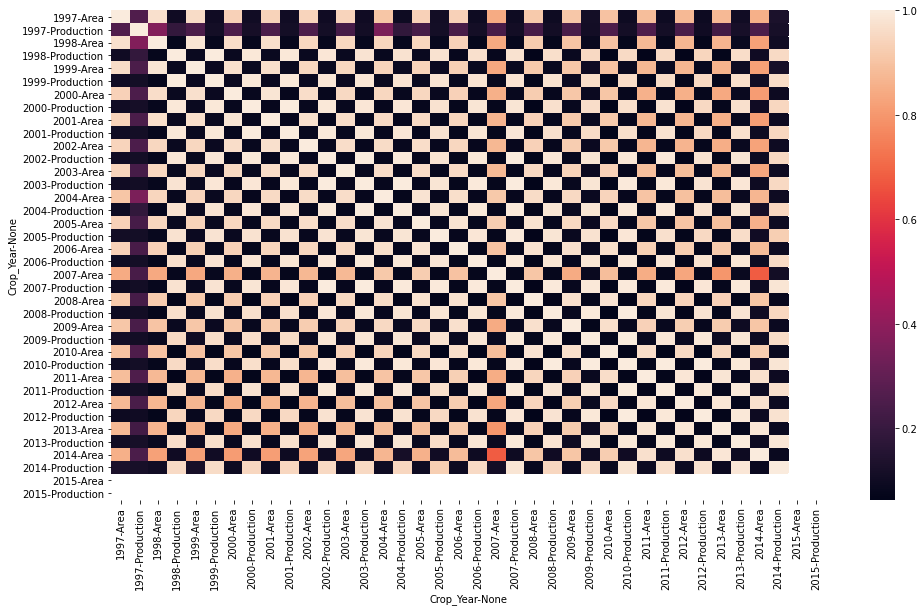

In [12]:
# 7
print('Correlation of df1: ')
plt.figure(figsize=(16,9))
sns.heatmap(df1.corr())
plt.show()

In [20]:

# 8
scaler = MinMaxScaler()
scaler.fit(df1)
print(scaler.transform(df1))

KeyboardInterrupt: 

In [14]:
# 9
standardScaler = StandardScaler()
print(standardScaler.fit_transform(df2))

[[ 0.14408484 -0.05506574  0.65328965 ... -0.04503896 -0.04999507
  -0.04729594]
 [-0.07283997 -0.06282147 -0.08503703 ... -0.06447445 -0.04999507
  -0.04729594]
 [-0.07538918 -0.06260603 -0.18979408 ... -0.06327969 -0.04999507
  -0.04729594]
 ...
 [-0.07283997 -0.06282147 -0.18979408 ... -0.06447445 -0.04999507
  -0.04729594]
 [ 2.29278082  0.85166233  8.20989626 ...  1.49186945 -0.04999507
  -0.04729594]
 [-0.07283997 -0.06282147 -0.18979408 ... -0.06591677 -0.04999507
  -0.04729594]]
